In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.shape


(55500, 15)

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [26]:
df['Doctor'].nunique()

40341

In [8]:
df.drop(columns=['Name','Discharge Date','Date of Admission'],axis=1,inplace=True)

In [9]:
df.head(5)

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal


In [10]:
df.tail(5)

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
55495,42,Female,O+,Asthma,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,Aspirin,Normal
55497,38,Female,B+,Hypertension,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,Ibuprofen,Abnormal
55499,53,Female,O+,Arthritis,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,Ibuprofen,Abnormal


In [11]:
df.isnull().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Medication            0
Test Results          0
dtype: int64

## There is no  missing values

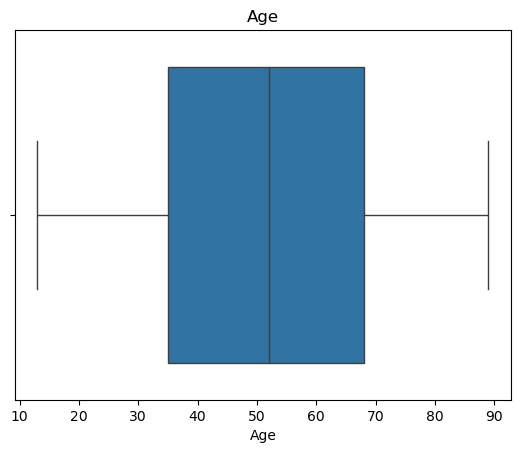

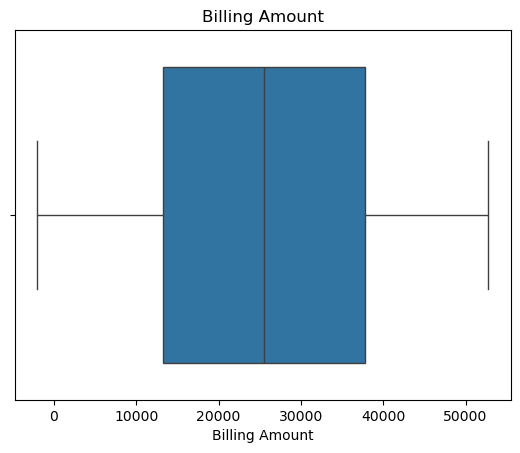

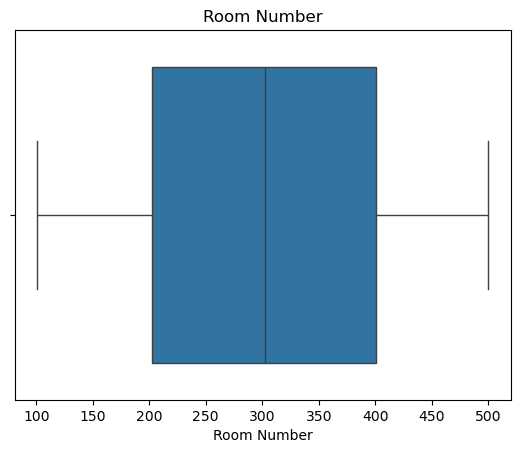

In [12]:
num = df.select_dtypes(['int', 'float'])

for col in num.columns:
    sns.boxplot(x=num[col])
    plt.title(col)
    plt.show()


## there is outliers

# Feature Encoding

In [13]:
df.dtypes

Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Medication             object
Test Results           object
dtype: object

In [14]:
df.select_dtypes('object').nunique()

Gender                    2
Blood Type                8
Medical Condition         6
Doctor                40341
Hospital              39876
Insurance Provider        5
Admission Type            3
Medication                5
Test Results              3
dtype: int64

In [15]:
df1=pd.get_dummies(df['Gender'],drop_first=True).astype(int)
df1.rename(columns={'Male':'Gender'},inplace=True)
df.drop('Gender',axis=1,inplace=True)
df=pd.concat([df,df1],axis=1)
df.head(2)

,Age,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Gender
0,30,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,1
1,62,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,1


In [16]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [17]:
df1=pd.get_dummies(df['Blood Type']).astype(int)

In [18]:
df=pd.concat([df,df1],axis=1)

In [19]:
df.drop('Blood Type',axis=1,inplace=True)

In [20]:
df['Medical Condition'].nunique()

6

In [21]:
df1=pd.get_dummies(df['Medical Condition']).astype(int)
df.drop('Medical Condition',axis=1,inplace=True)

In [22]:
df=pd.concat([df,df1],axis=1)
df.head(3)

,Age,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Gender,...,B+,B-,O+,O-,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
0,30,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,1,...,0,1,0,0,0,0,1,0,0,0
1,62,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,1,...,0,0,0,0,0,0,0,0,0,1
2,76,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df['Test Results'].nunique()

3

In [24]:
x=df.drop('Test Results',axis=1)
y=df['Test Results'].map({
    'Normal': 1,
    'Inconclusive': 0,
    'Abnormal': 2})

In [25]:
from category_encoders import TargetEncoder
te = TargetEncoder(cols=['Hospital'])
df[['Hospital']] = te.fit_transform(df[['Hospital']], y)


In [26]:
df.head(4)

,Age,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Gender,...,B+,B-,O+,O-,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
0,30,Matthew Smith,1.065027,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,1,...,0,1,0,0,0,0,1,0,0,0
1,62,Samantha Davies,1.036886,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,1,...,0,0,0,0,0,0,0,0,0,1
2,76,Tiffany Mitchell,0.920072,Aetna,27955.096079,205,Emergency,Aspirin,Normal,0,...,0,0,0,0,0,0,0,0,0,1
3,28,Kevin Wells,1.134356,Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,0,...,0,0,1,0,0,0,0,1,0,0


In [27]:
te=TargetEncoder(cols='Doctor')
df[['Doctor']]=te.fit_transform(df[['Doctor']],y)

In [28]:
df.head(5)

,Age,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Gender,...,B+,B-,O+,O-,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
0,30,1.002805,1.065027,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,1,...,0,1,0,0,0,0,1,0,0,0
1,62,0.874139,1.036886,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,1,...,0,0,0,0,0,0,0,0,0,1
2,76,1.004248,0.920072,Aetna,27955.096079,205,Emergency,Aspirin,Normal,0,...,0,0,0,0,0,0,0,0,0,1
3,28,1.134356,1.134356,Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,0,...,0,0,1,0,0,0,0,1,0,0
4,43,1.146041,1.146041,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df.drop(columns=['Insurance Provider','Room Number'],axis=1,inplace=True)

In [30]:
df.head(5)

,Age,Doctor,Hospital,Billing Amount,Admission Type,Medication,Test Results,Gender,A+,A-,...,B+,B-,O+,O-,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
0,30,1.002805,1.065027,18856.281306,Urgent,Paracetamol,Normal,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,62,0.874139,1.036886,33643.327287,Emergency,Ibuprofen,Inconclusive,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,76,1.004248,0.920072,27955.096079,Emergency,Aspirin,Normal,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,28,1.134356,1.134356,37909.782410,Elective,Ibuprofen,Abnormal,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,43,1.146041,1.146041,14238.317814,Urgent,Penicillin,Abnormal,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [36]:
df1=pd.get_dummies(df['Admission Type']).astype(int)
df=pd.concat([df,df1],axis=1)

In [39]:
df.drop('Admission Type',axis=1,inplace=True)

In [40]:
df.head(2)

,Age,Doctor,Hospital,Billing Amount,Medication,Test Results,Gender,A+,A-,AB+,...,O-,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity,Elective,Emergency,Urgent
0,30,1.002805,1.065027,18856.281306,Paracetamol,Normal,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,62,0.874139,1.036886,33643.327287,Ibuprofen,Inconclusive,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [43]:
df1=pd.get_dummies(df['Medication']).astype(int)

In [44]:
df.drop('Medication',axis=1,inplace=True)

In [45]:
df=pd.concat([df,df1],axis=1)

In [46]:
df.head()

,Age,Doctor,Hospital,Billing Amount,Test Results,Gender,A+,A-,AB+,AB-,...,Hypertension,Obesity,Elective,Emergency,Urgent,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
0,30,1.002805,1.065027,18856.281306,Normal,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,62,0.874139,1.036886,33643.327287,Inconclusive,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,76,1.004248,0.920072,27955.096079,Normal,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
3,28,1.134356,1.134356,37909.782410,Abnormal,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,43,1.146041,1.146041,14238.317814,Abnormal,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Test Results']=le.fit_transform(df['Test Results'])

In [49]:
df.head()

,Age,Doctor,Hospital,Billing Amount,Test Results,Gender,A+,A-,AB+,AB-,...,Hypertension,Obesity,Elective,Emergency,Urgent,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
0,30,1.002805,1.065027,18856.281306,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,62,0.874139,1.036886,33643.327287,1,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,76,1.004248,0.920072,27955.096079,2,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
3,28,1.134356,1.134356,37909.782410,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,43,1.146041,1.146041,14238.317814,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Scaling

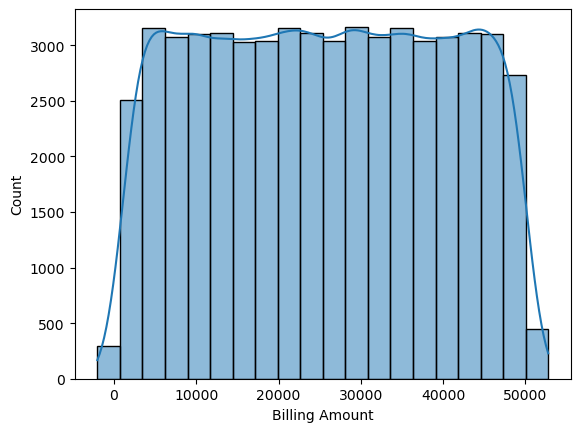

In [50]:
sns.histplot(df['Billing Amount'],bins=20,kde=True)
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df['Billing Amount']=sc.fit_transform(df[['Billing Amount']])

In [53]:
df.head(5)

,Age,Doctor,Hospital,Billing Amount,Test Results,Gender,A+,A-,AB+,AB-,...,Hypertension,Obesity,Elective,Emergency,Urgent,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
0,30,1.002805,1.065027,0.380933,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,62,0.874139,1.036886,0.650904,1,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,76,1.004248,0.920072,0.547053,2,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
3,28,1.134356,1.134356,0.728798,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,43,1.146041,1.146041,0.296622,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
